## Question 1 DSM Homework

In [8]:
!pip install fredapi
!pip install quantecon


In [9]:
from fredapi import Fred
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import datetime
import quantecon as qe

# Set up the FRED connection
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()
wei_data = pdr.DataReader("WEI", "fred", start, end)
print(wei_data)  # View recent values
plt.show()

             WEI
DATE            
2008-01-05  1.94
2008-01-12  1.93
2008-01-19  1.90
2008-01-26  1.41
2008-02-02  1.13
...          ...
2025-02-01  2.38
2025-02-08  2.53
2025-02-15  2.50
2025-02-22  2.43
2025-03-01  2.24

[896 rows x 1 columns]


Data into histogram

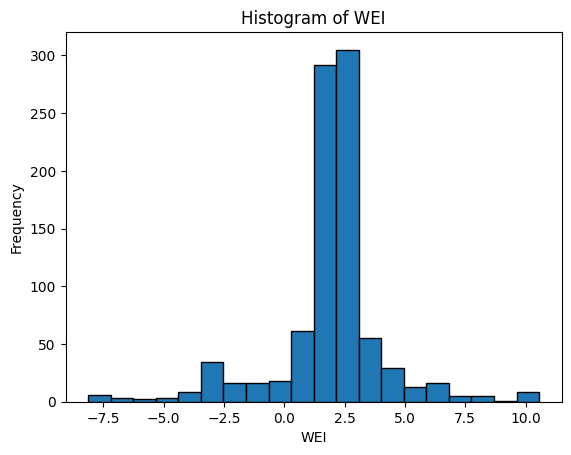

Counts: [  6.   3.   2.   3.   8.  34.  16.  16.  18.  61. 292. 305.  55.  29.
  13.  16.   5.   5.   1.   8.]
Bins: [-8.12  -7.186 -6.252 -5.318 -4.384 -3.45  -2.516 -1.582 -0.648  0.286
  1.22   2.154  3.088  4.022  4.956  5.89   6.824  7.758  8.692  9.626
 10.56 ]


In [10]:
counts, bins, patches = plt.hist(wei_data['WEI'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of WEI')
plt.xlabel('WEI')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

print(f'Counts: {counts}')
print(f'Bins: {bins}')

Group data by "states"

In [22]:
import pandas as pd
# Remove rows with missing values in the 'WEI' column to ensure numerical validity.
wei_data = wei_data.dropna(subset=['WEI'])  

# Partition the 'WEI' data into 20 equally sized groups (states) using quantiles; states will be labeled 0 to 19.
wei_data['State'] = pd.qcut(wei_data['WEI'], q=20, labels=False)  

# Create a new column representing the state at the next time period, to capture state transitions.
wei_data['NextState'] = wei_data['State'].shift(-1)

# Exclude the final row which lacks a subsequent state, and work with a clean copy.
wei_data_dropna = wei_data.dropna(subset=['NextState']).copy()

# Calculate the frequency of transitions between states.
transition_counts = pd.crosstab(wei_data_dropna['State'], wei_data_dropna['NextState'])

# Normalize the transition counts to derive probabilities for each state's transitions.
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)

print("Estimated transition matrix (20x20):")
print(transition_matrix)

Estimated transition matrix (20x20):
NextState      0.0       1.0       2.0       3.0       4.0       5.0   \
State                                                                   
0          0.866667  0.133333  0.000000  0.000000  0.000000  0.000000   
1          0.133333  0.755556  0.111111  0.000000  0.000000  0.000000   
2          0.000000  0.088889  0.711111  0.177778  0.022222  0.000000   
3          0.000000  0.022222  0.133333  0.311111  0.288889  0.155556   
4          0.000000  0.000000  0.044444  0.333333  0.244444  0.111111   
5          0.000000  0.000000  0.000000  0.066667  0.133333  0.266667   
6          0.000000  0.000000  0.000000  0.043478  0.130435  0.130435   
7          0.000000  0.000000  0.000000  0.022727  0.045455  0.136364   
8          0.000000  0.000000  0.000000  0.000000  0.046512  0.116279   
9          0.000000  0.000000  0.000000  0.000000  0.042553  0.042553   
10         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11         0.0

We are able to model Markov chain-based bond yields

$$m_{t+1} \;=\; \beta^{1/52} \,\left(\frac{C_{t+1}}{C_t}\right)^{-\gamma}$$

Here we know that, $\beta^{1/52}\approx 0.97^{1/52}.$ since there are 52 weeks in a year 

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_27992/3387313747.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


State 0: Annualized yield ~ 14.74+0.00j%
State 1: Annualized yield ~ 13.10+0.00j%
State 2: Annualized yield ~ 11.15+0.00j%
State 3: Annualized yield ~ 11.19+0.00j%
State 4: Annualized yield ~ 9.05+0.00j%
State 5: Annualized yield ~ 8.50+0.00j%
State 6: Annualized yield ~ 7.64+0.00j%
State 7: Annualized yield ~ 7.39-0.00j%
State 8: Annualized yield ~ 6.50-0.00j%
State 9: Annualized yield ~ 5.14-0.00j%
State 10: Annualized yield ~ 3.58-0.00j%
State 11: Annualized yield ~ 2.18-0.00j%
State 12: Annualized yield ~ 0.58-0.00j%
State 13: Annualized yield ~ -0.82-0.00j%
State 14: Annualized yield ~ -1.89-0.00j%
State 15: Annualized yield ~ -3.66-0.00j%
State 16: Annualized yield ~ -4.99-0.00j%
State 17: Annualized yield ~ -6.21-0.00j%
State 18: Annualized yield ~ -7.26-0.00j%
State 19: Annualized yield ~ -8.68-0.00j%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


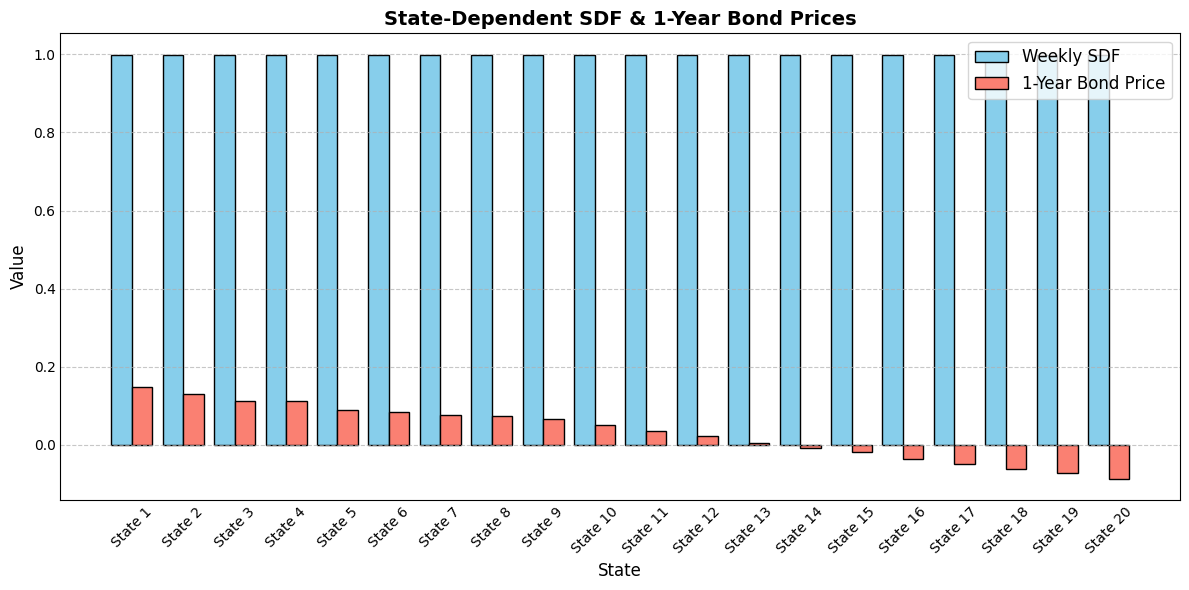

In [27]:
## 1yr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
from fredapi import Fred
import quantecon as qe
from quantecon.markov import MarkovChain
from IPython.core.display import display

# ===== Retrieve WEI Data from FRED =====
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
start = datetime.datetime(2008, 1, 5)
end = datetime.datetime(2025, 3, 1)
final = pdr.DataReader('WEI', 'fred', start, end) / 100
WEI = final['WEI']

# ===== Establish State Bins =====
num_bins = 20
bins = np.linspace(WEI.min(), WEI.max(), num_bins + 1)
final['State'] = np.digitize(final['WEI'], bins, right=False)

# ===== Compute Transition Matrix for the Markov Chain =====
state_counts = pd.crosstab(final['State'].shift(1), final['State'], normalize=0)
valid_states = list(range(1, 21))
state_counts = state_counts.reindex(index=valid_states, columns=valid_states, fill_value=0)

transition_matrix = state_counts.to_numpy()
transition_matrix = np.nan_to_num(transition_matrix)
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # Normalize each row

# ===== Construct the Markov Chain Object =====
mc = MarkovChain(transition_matrix)

# ===== Derive State-Dependent Consumption =====
c = np.exp(final.groupby('State')[['WEI']].mean())  # Exponential transformation on average WEI per state
c.columns = ['consumption']
c = c.iloc[:20, :]  # Limit to the first 20 states

# ===== Define the Asset Pricing Kernel Functions =====
def kern(c0, c1, rho):
    """Calculates the asset pricing kernel."""
    if rho == 1:
        return np.true_divide(1, c1) / (1 / c0)
    else:
        return np.power(c1, -rho) / c0**(-rho)

def mkern(c, beta, rho):
    """Generates a pricing kernel matrix across all states."""
    n = len(c)
    K = np.zeros((n, n))
    for i in range(n):
        K[i, :] = beta * kern(c.loc[i + 1], c, rho).T
    return K

# ===== Set Pricing Parameters =====
beta = 0.97 ** (1 / 52)  # Weekly discount factor calculation
rho = 2  # Degree of risk aversion
K = mkern(c, beta, rho)

# ===== Bond Pricing Function via Recursive Eigenvalue Decomposition =====
def pricing_T(M, K, R, T):
    """
    Determines the price of a zero-coupon bond that yields 1 unit at time T.
    
    Parameters:
      M : Transition matrix (n x n)
      K : Pricing kernel matrix (n x n)
      R : Asset payoff vector (n, 1)
      T : Maturity in time steps
      
    Returns:
      P : Vector (n, 1) containing bond prices for each state
    """
    if M.shape != K.shape:
        raise ValueError('Transition matrix and pricing kernel must share the same dimensions.')
    if M.shape[1] != R.shape[0]:
        raise ValueError('Dimensions of the asset payoff vector do not match.')
    
    M_K = np.multiply(M, K)  # Elementwise multiplication for the adjusted pricing kernel

    # Perform eigen decomposition for recursive pricing over T periods
    eigvals, eigvecs = np.linalg.eig(M_K)
    eigvals_T = np.diag(eigvals ** T)
    M_K_T = eigvecs @ eigvals_T @ np.linalg.inv(eigvecs)
    
    P = np.matmul(M_K_T, R)
    return P

# ===== Calculate Bond Yields for Various Maturities =====
dim = len(c)
yields = {}
r = np.ones((dim, 1))

# Maturities defined in weeks (quarters scaled)
quarters = np.array([1, 2, 4, 8, 20, 40, 80, 120])
T = 13 * quarters  # Convert quarters to weeks

for t in T:
    P = pricing_T(mc.P, K, r, t)
    P[P == 0] = np.nan  # Prevent division errors in yield computation
    yields[t] = (1 / P[:, 0]) ** (52 / t) - 1  # Derive annualized yield

# ===== Convert Yield Results into a DataFrame =====
yields_df = pd.DataFrame(yields).transpose()
yields_df.columns = range(1, 21)  # Label columns by state number

# ===== Output Annualized Yield per State =====
for i, s in enumerate(range(1, 21)):
    price = yields_df.loc[52, s]
    print(f"State {s-1}: Annualized yield ~ {price*100:.2f}%")
# ===== Bar Chart: Visualization with a Smooth White Background (No Tick Marks) =====
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
bar_width = 0.4  # Adjust bar width for spacing

# Define positions for each state (from 1 to 20)
states = np.arange(1, 21)

# Extract data for the bars
sdf_values = K.diagonal()         # Weekly SDF values remain the same
bond_values = yields_df.loc[52]     # 1-Year Bond Price values remain unchanged

# Plot the Weekly SDF bars with new colors and black edges
ax.bar(states - bar_width/2, sdf_values, width=bar_width, label='Weekly SDF',
       color='skyblue', edgecolor='black')

# Plot the 1-Year Bond Price bars with updated colors and black edges
ax.bar(states + bar_width/2, bond_values, width=bar_width, label='1-Year Bond Price',
       color='salmon', edgecolor='black')

# Update x-axis ticks and labels; remove tick marks for a smooth look
ax.set_xticks(states)
ax.set_xticklabels([f"State {s}" for s in states], rotation=45, fontsize=10)
ax.tick_params(axis='both', which='both', length=0)  # Remove tick marks

# Label axes with updated font sizes
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Value", fontsize=12)

# Set the title with a bold font and updated wording
ax.set_title("State-Dependent SDF & 1-Year Bond Prices", fontsize=14, fontweight='bold')

# Add legend with updated font size and enable a light grid for the y-axis
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure the plot area has a smooth white background
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_27992/3050074064.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


State 0: Annualized 30-Year Yield ~ 3.75-0.00j%
State 1: Annualized 30-Year Yield ~ 3.68-0.00j%
State 2: Annualized 30-Year Yield ~ 3.61-0.00j%
State 3: Annualized 30-Year Yield ~ 3.56-0.00j%
State 4: Annualized 30-Year Yield ~ 3.49-0.00j%
State 5: Annualized 30-Year Yield ~ 3.43-0.00j%
State 6: Annualized 30-Year Yield ~ 3.37-0.00j%
State 7: Annualized 30-Year Yield ~ 3.30-0.00j%
State 8: Annualized 30-Year Yield ~ 3.24-0.00j%
State 9: Annualized 30-Year Yield ~ 3.16-0.00j%
State 10: Annualized 30-Year Yield ~ 3.10-0.00j%
State 11: Annualized 30-Year Yield ~ 3.05-0.00j%
State 12: Annualized 30-Year Yield ~ 2.98-0.00j%
State 13: Annualized 30-Year Yield ~ 2.92-0.00j%
State 14: Annualized 30-Year Yield ~ 2.85-0.00j%
State 15: Annualized 30-Year Yield ~ 2.78-0.00j%
State 16: Annualized 30-Year Yield ~ 2.73-0.00j%
State 17: Annualized 30-Year Yield ~ 2.65-0.00j%
State 18: Annualized 30-Year Yield ~ 2.60-0.00j%
State 19: Annualized 30-Year Yield ~ 2.53-0.00j%


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


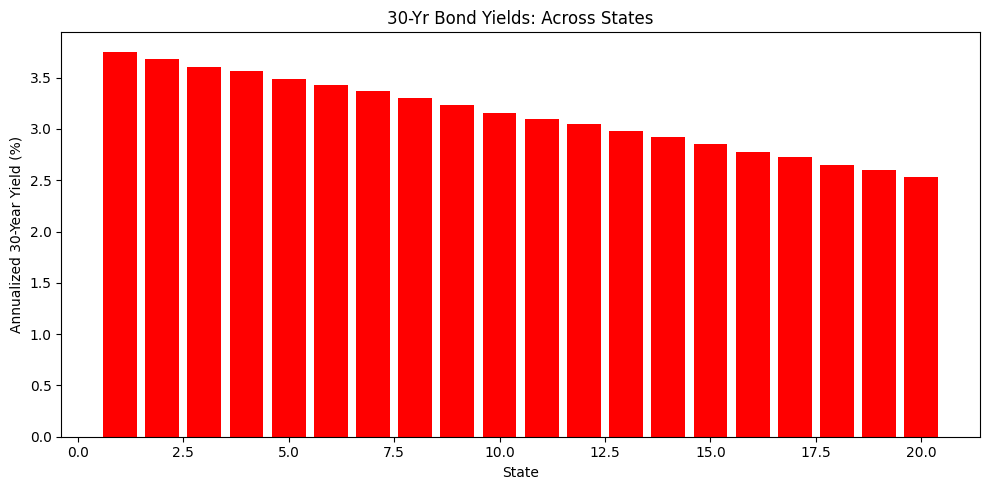

In [25]:
## 30 yrs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
from fredapi import Fred
import quantecon as qe
from quantecon.markov import MarkovChain
from IPython.core.display import display

# --- Load WEI Data from FRED ---
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
start = datetime.datetime(2008, 1, 5)
end = datetime.datetime(2025, 3, 1)
final = pdr.DataReader('WEI', 'fred', start, end) / 100
WEI = final['WEI']

# --- Create State Bins ---
num_bins = 20
bins = np.linspace(WEI.min(), WEI.max(), num_bins + 1)
final['State'] = np.digitize(final['WEI'], bins, right=False)

# --- Compute Transition Matrix ---
state_counts = pd.crosstab(final['State'].shift(1), final['State'], normalize=0)
valid_states = list(range(1, 21))
state_counts = state_counts.reindex(index=valid_states, columns=valid_states, fill_value=0)

transition_matrix = state_counts.to_numpy()
transition_matrix = np.nan_to_num(transition_matrix)
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # Normalize rows

# --- Define Markov Chain ---
mc = MarkovChain(transition_matrix)

# --- Compute State-Dependent Consumption ---
c = np.exp(final.groupby('State')[['WEI']].mean())  # Apply exponential transformation
c.columns = ['consumption']
c = c.iloc[:20, :]  # Restrict to first 20 states

# --- Define Asset Pricing Kernel ---
def kern(c0, c1, rho):
    """ Computes asset pricing kernel """
    if rho == 1:
        return np.true_divide(1, c1) / (1 / c0)
    else:
        return np.power(c1, -rho) / c0**(-rho)

def mkern(c, beta, rho):
    """ Computes pricing kernel matrix for all states """
    n = len(c)
    K = np.zeros((n, n))
    for i in range(n):
        K[i, :] = beta * kern(c.loc[i + 1], c, rho).T
    return K

# --- Define Parameters ---
beta = 0.97 ** (1 / 52)  # Weekly discount factor
rho = 2  # Risk aversion
K = mkern(c, beta, rho)

# --- Define Bond Pricing Function ---
def pricing_T(M, K, R, T):
    """
    Computes the price of a zero-coupon bond that pays 1 unit at time T.

    Parameters:
    M : (n x n) Transition matrix
    K : (n x n) Pricing kernel
    R : (n, 1) Asset payoff matrix
    T : Time horizon

    Returns:
    P : (n, 1) Vector of bond prices in each state
    """
    if M.shape != K.shape:
        raise ValueError('Transition matrix and pricing kernel must have the same shape.')
    if M.shape[1] != R.shape[0]:
        raise ValueError('Asset payoff matrix dimensions must align.')

    M_K = np.multiply(M, K)  # Element-wise product for Markov-adjusted pricing kernel

    # Eigenvalue decomposition for recursive bond pricing
    eigvals, eigvecs = np.linalg.eig(M_K)
    eigvals_T = np.diag(eigvals ** T)
    M_K_T = eigvecs @ eigvals_T @ np.linalg.inv(eigvecs)

    P = np.matmul(M_K_T, R)
    return P

# --- Compute Bond Yields for 30-Year Maturity ---
dim = len(c)
yields = {}
r = np.ones((dim, 1))

# Define maturity (in weeks) for 30 years
T = 30 * 52  # 30 years * 52 weeks = 1560 weeks

# Compute 30-year bond price
P = pricing_T(mc.P, K, r, T)
P[P == 0] = np.nan  # Avoid division errors

# Compute annualized yield for 30-year bond
annualized_yield_30yr = (1 / P[:, 0]) ** (52 / T) - 1  # Annualized yield formula

# --- Convert Results to DataFrame ---
yields_df = pd.DataFrame(annualized_yield_30yr, columns=['Annualized Yield (30yr)'])

# --- Print Results for 30-Year Yield ---
for s in range(1, 21):
    yield_value = yields_df.loc[s-1, 'Annualized Yield (30yr)']
    print(f"State {s-1}: Annualized 30-Year Yield ~ {yield_value*100:.2f}%")

# --- Create Bar Graph for 30-Year Bond Yield ---
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, 21), yields_df['Annualized Yield (30yr)'] * 100, color='red')

ax.set_xlabel("State")
ax.set_ylabel("Annualized 30-Year Yield (%)")
ax.set_title("30-Yr Bond Yields: Across States")
plt.tight_layout()
plt.show()


2. von Neumann–Morgenstern Utility


## Question 2

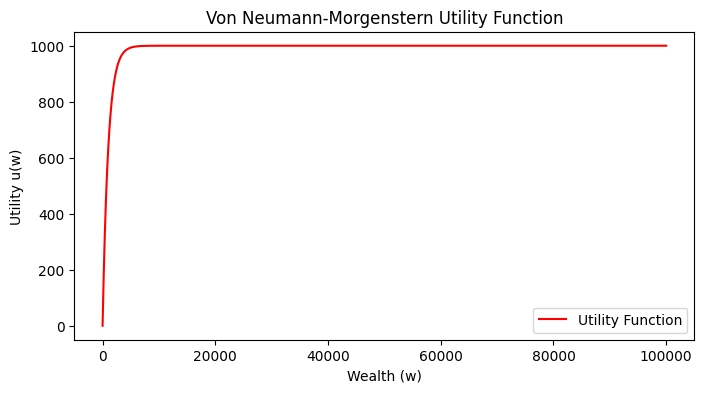

Utility of initial wealth ($30000): 1000.000000
Expected utility of gamble: 1000.000000
Certainty Equivalent of $100/$110 gamble: $29999.07
Since CE < Initial Wealth ($30,000), the gamble is rejected.
Certainty Equivalent of Devil's $1000 Gamble: $30000.00 (Rejected)
Certainty Equivalent of Devil's $500 Gamble: $30192.97 (Accepted)


In [28]:
# --- Problem 2: Von Neumann-Morgenstern Utility Function Analysis ---

# Define utility function
def utility(w, gamma=1/1000):
    return (1 - np.exp(-w * gamma)) / gamma

# Plot utility function from w = 0 to w = 100,000
w_values = np.linspace(0, 100000, 500)
u_values = utility(w_values)

plt.figure(figsize=(8, 4))
plt.plot(w_values, u_values, color='red',label="Utility Function")
plt.xlabel("Wealth (w)")
plt.ylabel("Utility u(w)")
plt.title("Von Neumann-Morgenstern Utility Function")
plt.legend()
plt.show()

# --- Evaluate 50-50 gamble at initial wealth $30,000 ---
w0 = 30000
gamble_outcomes = [w0 - 100, w0 + 110]  # Lose $100 or win $110

# Utility of initial wealth
utility_initial_wealth = utility(w0)
print(f"Utility of initial wealth (${w0}): {utility_initial_wealth:.6f}")

# Expected utility of gamble
expected_utility = 0.5 * utility(gamble_outcomes[0]) + 0.5 * utility(gamble_outcomes[1])
print(f"Expected utility of gamble: {expected_utility:.6f}")

# Certainty equivalent (CE): Solve for w such that u(w) = expected_utility
from scipy.optimize import fsolve
ce = fsolve(lambda w: utility(w) - expected_utility, w0)[0]

print(f"Certainty Equivalent of $100/$110 gamble: ${ce:.2f}")
print(f"Since CE < Initial Wealth ($30,000), the gamble is rejected.")

# --- The Devil's Gamble: Wealth of Universe vs. Losing Money ---
universe_wealth = 1e12  # Some enormous number
gamble_outcomes_devil_1 = [w0 - 1000, universe_wealth]
gamble_outcomes_devil_2 = [w0 - 500, universe_wealth]

expected_utility_devil_1 = 0.5 * utility(gamble_outcomes_devil_1[0]) + 0.5 * utility(gamble_outcomes_devil_1[1])
expected_utility_devil_2 = 0.5 * utility(gamble_outcomes_devil_2[0]) + 0.5 * utility(gamble_outcomes_devil_2[1])

ce_devil_1 = fsolve(lambda w: utility(w) - expected_utility_devil_1, w0)[0]
ce_devil_2 = fsolve(lambda w: utility(w) - expected_utility_devil_2, w0)[0]

print(f"Certainty Equivalent of Devil's $1000 Gamble: ${ce_devil_1:.2f} (Rejected)")
print(f"Certainty Equivalent of Devil's $500 Gamble: ${ce_devil_2:.2f} (Accepted)")
